In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs




In [ ]:
def plot_sep(w, X, Y, color='green'):
  ''' Plot decision boundary hypothesis
  w1 * sepal_len + w2 * sepal_wid = 0
  in input space, highlighting the hyperplane '''
  w0=w[0,0]
  w1=w[1,0]
  w2=w[2,0]
  plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired)
  plt.title("Separation in Input Space")
  plt.ylim([np.amin(X[:,1]),np.amax(X[:,1])])
  plt.xlim([np.amin(X[:,0]),np.amax(X[:,0])])
  plt.xlabel("X1")
  plt.ylabel("X2")
  if w2 != 0:
     m = -w1/w2
     t = 1 if w2 > 0 else -1
     plt.plot([np.amin(X[:,0]),np.amax(X[:,0])],[np.amin(X[:,0])*m- w0/w2, np.amax(X[:,0])*m- w0/w2],'-y',color=color)
     plt.fill_between(
                    [np.amin(X[:,0]),np.amax(X[:,0])],
                    [np.amin(X[:,0])*m- w0/w2, np.amax(X[:,0])*m- w0/w2],
                    [t*np.amax(np.abs(X[:,1]))],
                    alpha=0.2,
                    color=color)
  if w2 == 0: # decision boundary is vertical
      t = 1 if w1 > 0 else -1
      plt.plot([0, 0],[np.amin(X[:,0]), np.amax(X[:,0])],'-y',color=color)
      plt.fill_between(
                    [0, np.amax(np.abs(X))*t],
                    [-np.amax(np.abs(X))],
                    [np.amax(np.abs(X))],
                    alpha=0.2,
                    color=color)

In [ ]:
# Vectorize plr2d
def plr2d_vectorize(X ,T, N):
    #initilize input as np array and convert to row vector
    X=np.array(X)
    if (np.size(X,0) >= np.size(X,1)):
      X=np.transpose(X)

    #initilize weight vector
    W=np.zeros((X.shape[0]+1,1))
    
    # Perceptron learning
    for n in range(0,N,1):
      mismatched=False
      for i in range(T.shape[0]):
        z=np.dot(X[:,i],W[1:])+W[0]
        if z*(T[i]) <= 0:
          mismatched = True
          W[0] = W[0] + (T[i])*1
          W[1] = W[1] + (T[i])*(X[0,i])
          W[2] = W[2] + (T[i])*(X[1,i])
      if mismatched == False:
        print("converged: n=",n)
        break

    print("learning done")
    for i in range(0,T.shape[0]):
      z=np.dot(X[:,i],W[1:])+W[0]
      if z*(T[i]) <= 0:
        print("mismatch[",i,"]")

    return W

In [ ]:
def target_correction(Y):
  for i in range(len(Y)):
    if Y[i]==0:
      Y[i]=-1
  return (Y)


In [ ]:
def create_data_random(s):
  a=np.random.random([int (s),2])*5
  b=np.random.random([int (s)])
  for i in range(np.size(b)):
    if (b[i]<0.5):
      b[i]= -1
    else:
      b[i]= 1
  return (a,b)



In [ ]:
def create_data_linear(s):
  a=np.random.random([int (s),2])*5
  b=np.zeros(int (s))
  for i in range(int(s)):
    if (a[i,0]+a[i,1]>= 5):
      b[i]=1
    else:
      b[i]= -1
  return (a,b)


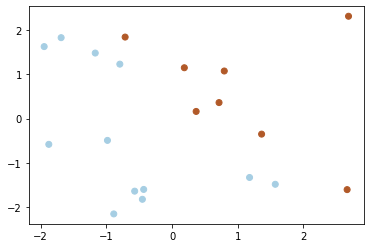

In [ ]:
X4,Y4= create_data_linear(20)
X4[:,0] -= np.mean(X4[:,0])
X4[:,1] -= np.mean(X4[:,1])
plt.scatter(X4[:,0],X4[:,1],c=Y4,cmap=plt.cm.Paired)

In [ ]:
W4=plr2d_vectorize(X4 ,Y4, 50)
print(W4)

converged: n= 1
learning done
[[-1.        ]
 [ 2.25311987]
 [ 2.10129804]]


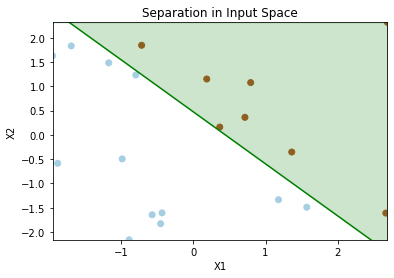

In [ ]:
plot_sep(W4,X4,Y4)

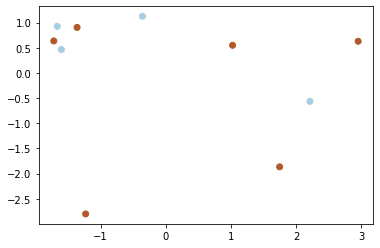

In [ ]:
X3,Y3= create_data_random(10)
X3[:,0] -= np.mean(X3[:,0])
X3[:,1] -= np.mean(X3[:,1])
plt.scatter(X3[:,0],X3[:,1],c=Y3,cmap=plt.cm.Paired)

In [ ]:
W3=plr2d_vectorize(X3 ,Y3, 50)
print(W3)

learning done
mismatch[ 1 ]
mismatch[ 2 ]
mismatch[ 4 ]
[[ 2.        ]
 [ 1.86338766]
 [-3.02963553]]


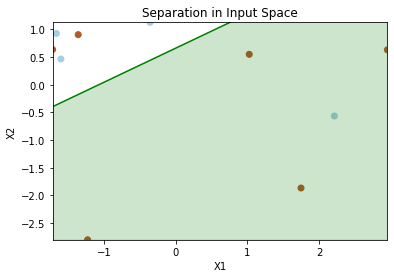

In [ ]:
plot_sep(W3,X3,Y3)

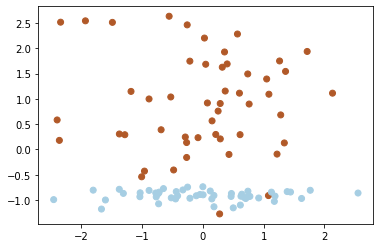

In [ ]:
#general random classification of 2 types 
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
X1[:,0] -= np.mean(X1[:,0])
X1[:,1] -= np.mean(X1[:,1])
Y1=target_correction(Y1)
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap=plt.cm.Paired)

In [ ]:
W1=plr2d_vectorize(X1 ,Y1, 10)
print(W1)

learning done
mismatch[ 35 ]
mismatch[ 58 ]
[[3.        ]
 [0.2597295 ]
 [4.93193709]]


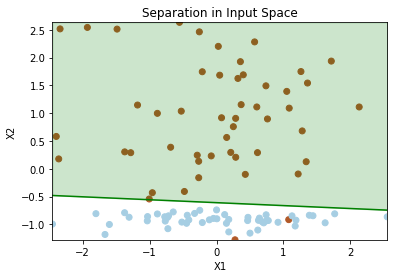

In [ ]:
plot_sep(W1,X1,Y1)

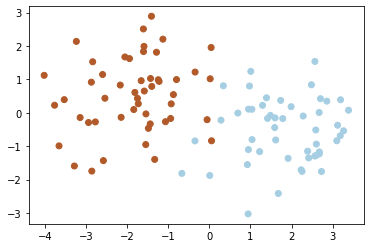

In [ ]:
# 2 classification blobs
X2, Y2 = make_blobs(n_features=2, centers=2)
X2[:,0] -= np.mean(X2[:,0])
X2[:,1] -= np.mean(X2[:,1])
Y2=target_correction(Y2)
plt.scatter(X2[:,0],X2[:,1],c=Y2,cmap=plt.cm.Paired)

In [ ]:
W2=plr2d_vectorize(X2 ,Y2, 10)
print(W2)

learning done
mismatch[ 3 ]
mismatch[ 18 ]
mismatch[ 23 ]
mismatch[ 58 ]
[[-1.        ]
 [-3.14446763]
 [ 3.09257734]]


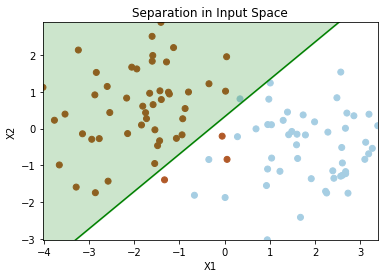

In [ ]:
plot_sep(W2,X2,Y2)